In [1]:
import pandas as pd
import os
def data_dictionary():
    path_train="/kaggle/input/dateset-23-skin/dataset/"
    list_train=os.listdir(path_train)
    train_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j   
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(k)     
        k+=1
    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [2]:
import gc


In [3]:
data=data_dictionary()

In [32]:
lable=data['target']

In [5]:

images=[]
label=[]
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
for i in data['image_path']:
    img = load_img(i, target_size=(64, 64))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images.append(x) 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [7]:
import numpy as np
import pandas as pd
dataset=np.array(images)


In [8]:
dataset.shape

(23184, 1, 64, 64, 3)

In [9]:
dataset = np.reshape(dataset, (23184, 64, 64, 3))

In [33]:
lable=np.array(lable)

In [11]:
import tensorflow as tf

In [12]:

import keras
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

from tensorflow.keras.layers import BatchNormalization, Conv2D, GlobalAveragePooling2D, MaxPooling2D
# Load the pretrained VGG19 model without the top (fully connected) layers
model = keras.applications.ResNet50(weights=None, include_top=True,classes=23 ,input_shape=(64, 64, 3))


In [13]:
x = base_model.output
x = BatchNormalization()(x)

x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Add a global average pooling layer to reduce the spatial dimensions of the features
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer with 256 units and ReLU activation
x = Dense(256, activation='relu')(x)

# Add the final classification layer with the number of classes in your dataset
predictions = Dense(23, activation='softmax')(x)
model = keras.Model(inputs=base_model.input, outputs=predictions)

In [14]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [34]:


# Freeze the weights of the base VGG19 model
for layer in model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [35]:
import keras
acc=[]
num_classes = 23
lable = keras.utils.to_categorical(lable, num_classes)

In [36]:
lable.shape

(23184, 23)

In [19]:
del history


NameError: name 'history' is not defined

In [20]:
gc.collect()

1013

In [37]:
from sklearn.model_selection import train_test_split
for i in range(3): 
    x_train,x_test, y_train, y_test=train_test_split(dataset, lable, test_size=0.1,random_state = np.random.randint(1,1000, 1)[0])
    x_train,x_valid,y_train,y_valid= train_test_split(x_train, y_train, test_size=0.1)
    history=model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid),batch_size=16,verbose=1) 
    model.evaluate(x_test,y_test)

Epoch 1/10
1174/1174 [==============================] - 22s 16ms/step - loss: 8.1659 - accuracy: 0.0441 - val_loss: 8.2282 - val_accuracy: 0.0383
Epoch 2/10
1174/1174 [==============================] - 17s 14ms/step - loss: 8.1659 - accuracy: 0.0441 - val_loss: 8.2282 - val_accuracy: 0.0383
Epoch 3/10
1174/1174 [==============================] - 16s 14ms/step - loss: 8.1659 - accuracy: 0.0441 - val_loss: 8.2282 - val_accuracy: 0.0383
Epoch 4/10
1174/1174 [==============================] - 15s 13ms/step - loss: 8.1659 - accuracy: 0.0441 - val_loss: 8.2282 - val_accuracy: 0.0383
Epoch 5/10
1174/1174 [==============================] - 17s 14ms/step - loss: 8.1659 - accuracy: 0.0441 - val_loss: 8.2282 - val_accuracy: 0.0383
Epoch 6/10
1171/1174 [============================>.] - ETA: 0s - loss: 8.1656 - accuracy: 0.0442

KeyboardInterrupt: 

# from sklearn.model_selection import train_test_split
for i in range(3): 
    x_train,x_test, y_train, y_test=train_test_split(dataset, lable, test_size=0.1,random_state = np.random.randint(1,1000, 1)[0])
    x_train,x_valid,y_train,y_valid= train_test_split(x_train, y_train, test_size=0.1)
    history=model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid),batch_size=16,verbose=1) 
    model.evaluate(x_test,y_test)

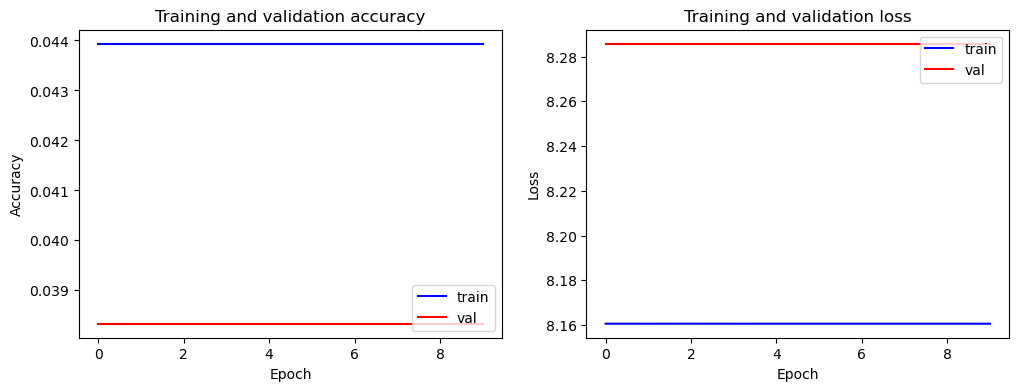

In [22]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))

# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

In [23]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_pred

73/73 [==============================] - 2s 14ms/step


array([ 4, 13,  4, ..., 13,  4,  4])

In [25]:
y_test=np.argmax(y_test, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [26]:
from sklearn.metrics import *
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       105
           1       0.00      0.00      0.00        90
           2       0.00      0.00      0.00       106
           3       0.00      0.00      0.00       105
           4       0.04      0.30      0.07        93
           5       0.00      0.00      0.00       109
           6       0.00      0.00      0.00        99
           7       0.00      0.00      0.00       104
           8       0.00      0.00      0.00        97
           9       0.00      0.00      0.00       102
          10       0.00      0.00      0.00        88
          11       0.00      0.00      0.00        94
          12       0.00      0.00      0.00       106
          13       0.05      0.76      0.09        99
          14       0.00      0.00      0.00       104
          15       0.00      0.00      0.00        93
          16       0.00      0.00      0.00        99
          17       0.00    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
acc=accuracy_score(y_test,y_pred)

In [28]:
acc

0.044415696420871065